In [1]:
library(tidyverse)
library(Seurat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
srt=readRDS('../a4-scCD74-redim/ScCD74-redim-20240513.Rds')

In [3]:
srt

An object of class Seurat 
52024 features across 54120 samples within 3 assays 
Active assay: RNA (25012 features, 2000 variable features)
 13 layers present: data.M21_1, data.M21_2, data.M3_1, data.M3_2, counts.M21_1, counts.M21_2, counts.M3_1, counts.M3_2, scale.data.M21_1, scale.data.M21_2, scale.data.M3_1, scale.data.M3_2, scale.data
 2 other assays present: integrated, CCA.RNA
 5 dimensional reductions calculated: pca.integrated, umap.integrated, pca.RNA, CCAIntegration.RNA, umap

In [5]:
names(srt@meta.data)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "percent.mt"             "sample"                 "group"                 
 [7] "integrated_snn_res.0.5" "seurat_clusters"        "celltype.group"        
[10] "celltype"               "barcode"                "celltype2"             
[13] "celltype3"              "RNA_snn_res.0.1"        "RNA_snn_res.0.2"       
[16] "RNA_snn_res.0.4"        "RNA_snn_res.0.6"        "RNA_snn_res.0.8"       
[19] "RNA_snn_res.1"          "celltype1"              "RNA_snn_res.0.01"      
[22] "RNA_snn_res.0.02"       "RNA_snn_res.0.04"       "RNA_snn_res.0.06"      
[25] "RNA_snn_res.0.08"

In [6]:
srt@meta.data$orig.ident='All'

In [7]:
Idents(srt)=srt@meta.data$orig.ident

In [13]:
srt[["percent.hb"]] <- PercentageFeatureSet(srt, pattern = "^Hb[^(p)]") 

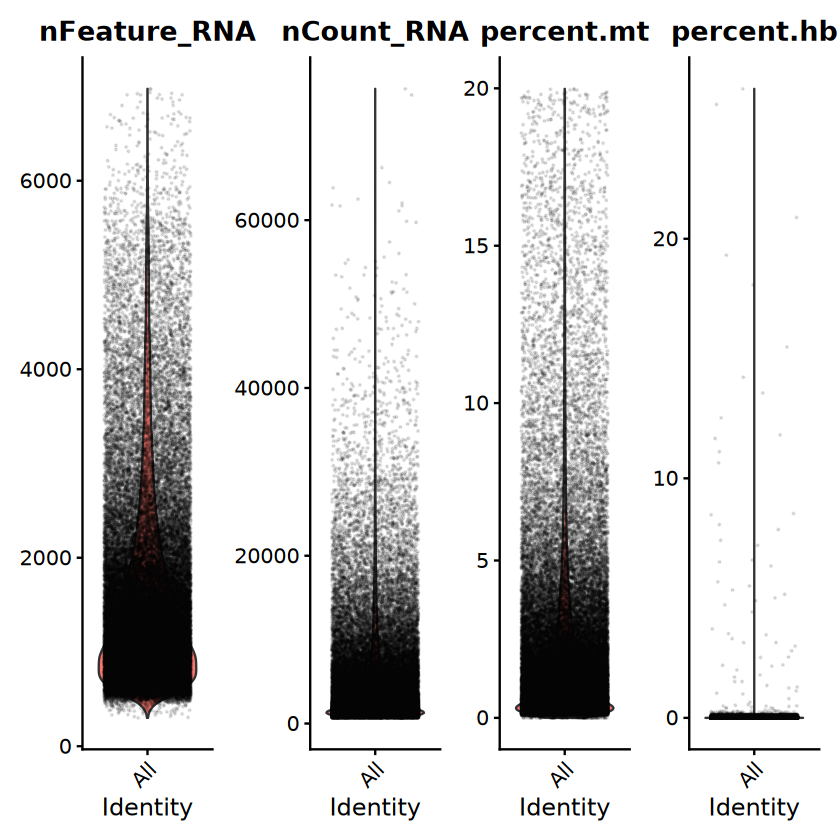

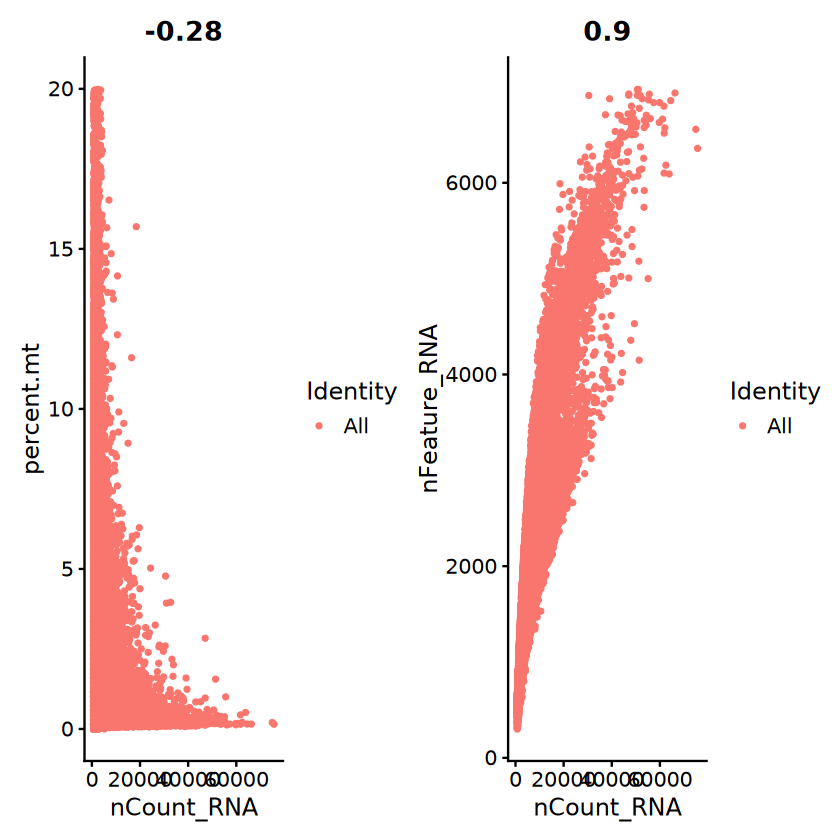

In [15]:
## qc plot
(qc1=VlnPlot(srt, 
             features=c("nFeature_RNA", "nCount_RNA", "percent.mt",'percent.hb'),
             alpha=0.1, pt.size=0.1, ncol=4) )
(qc2=FeatureScatter(srt, feature1="nCount_RNA", feature2="percent.mt")+
    FeatureScatter(srt, feature1="nCount_RNA", feature2="nFeature_RNA") )

In [16]:

ggsave('qc_scRNA/qcplot-1.pdf',height=6,width=6*3,plot=qc1)
ggsave('qc_scRNA/qcplot-2.pdf',height=6,width=6*2,plot=qc2)

In [11]:
srt

An object of class Seurat 
52024 features across 54120 samples within 3 assays 
Active assay: RNA (25012 features, 2000 variable features)
 13 layers present: data.M21_1, data.M21_2, data.M3_1, data.M3_2, counts.M21_1, counts.M21_2, counts.M3_1, counts.M3_2, scale.data.M21_1, scale.data.M21_2, scale.data.M3_1, scale.data.M3_2, scale.data
 2 other assays present: integrated, CCA.RNA
 5 dimensional reductions calculated: pca.integrated, umap.integrated, pca.RNA, CCAIntegration.RNA, umap

Warning message in ElbowPlot(srt, ndim = 50, reduction = "pca.integrated"):
“The object only has information for 30 reductions”


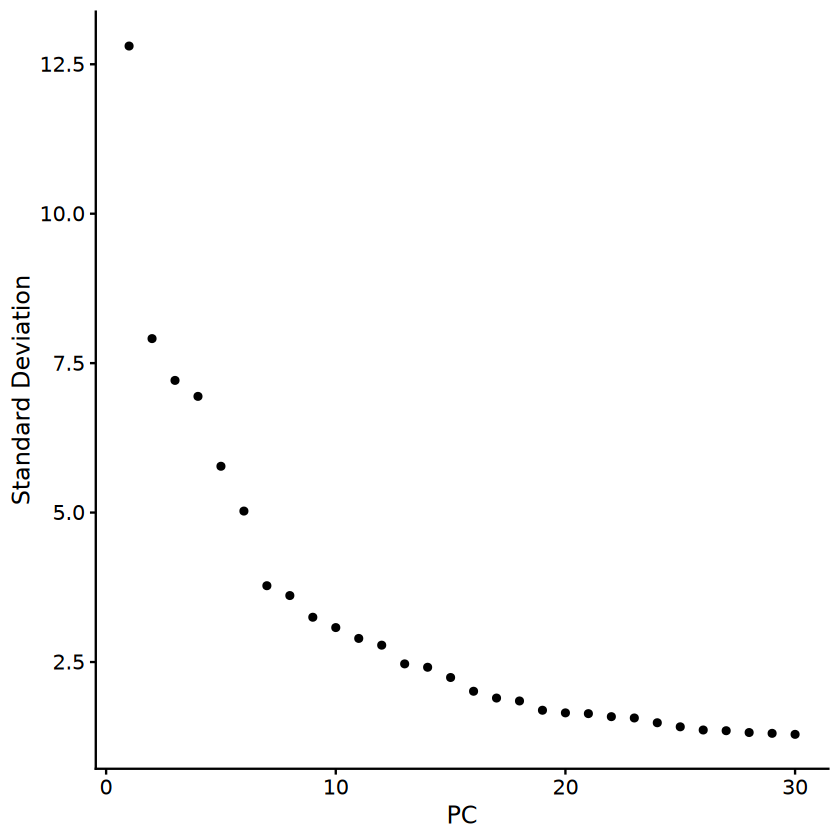

In [12]:
ElbowPlot(srt,ndim=50,reduction = 'pca.integrated')
ggsave('qc_scRNA/ElbowPlot.pdf',height=6,width=6*1)